# Case study compounds

Process file of EU-ToxRisk case study compounds assembed by Anne.

In [1]:
%run setup.py

### Config

In [2]:
# Directory for input files...

files_dir = 'files'

# Case study compounds file (TSV format) from Anne Hersey...

filename = 'case_study_compounds_141216.txt'

In [3]:
# Directory for reading and writing data files...

data_dir = 'data'

In [4]:
tick, cross = '\u2713', '\u2717'

### Initialisation

In [5]:
if not 'logger' in locals(): logger = make_logger.run(__name__)

### Load compounds

In [6]:
df0 = pd.read_csv(os.path.join(files_dir, filename), delimiter='\t')

df0.shape

(190, 10)

In [7]:
df0.head(1)

,Label,Case Study,CAS,deleted CAS Registry Numbers,Compound,Smiles,canonical_smiles,inchi,inchikey,alternative name
0,1,1,526-86-3,NaN,"2,3-Dimethyl-2,5-cyclohexadiene-1,4 dione",CC1=C(C)C(=O)C=CC1=O,CC1=C(C)C(=O)C=CC1=O,"InChI=1S/C8H8O2/c1-5-6(2)8(10)4-3-7(5)9/h3-4H,1-2H3",AIACLXROWHONEE-UHFFFAOYSA-N,NaN


In [8]:
# There are some issues with the compound names (i.e. column 'Compound')...

df = df0[['Compound', 'inchikey']].drop_duplicates()

duplicated = set(df['inchikey'][df['inchikey'].duplicated()])

df.query("inchikey in @duplicated").sort_values(['inchikey', 'Compound'])

,Compound,inchikey
86,Valproic Acid,NIJJYAXOARWZEE-UHFFFAOYSA-N
88,Valproic acid,NIJJYAXOARWZEE-UHFFFAOYSA-N
120,Hydroquinone,QIGBRXMKCJKVMJ-UHFFFAOYSA-N
119,hydroquinone,QIGBRXMKCJKVMJ-UHFFFAOYSA-N


In [9]:
# Drop unneeded columns and simplify column names...

df1 = (
    df0
        .drop(['Label', 'Smiles', 'deleted CAS Registry Numbers', 'alternative name'], axis=1)
        .rename(columns={
          'Compound':         'name'
        , 'canonical_smiles': 'smiles'
        })
        .fillna('')
    )

In [10]:
# Fix the compound name issues by standardising the names...

fixes = [
      ('Valproic acid', 'Valproic Acid')
    , ('hydroquinone',  'Hydroquinone')
]

for old, new in fixes: df1['name'] = df1['name'].str.replace(old, new)

In [11]:
# Check the compound name issues have disappeared...

df = df1[['name', 'inchikey']].drop_duplicates()

set(df['inchikey'][df['inchikey'].duplicated()])

set()

In [12]:
df1.head(1)

,Case Study,CAS,name,smiles,inchi,inchikey
0,1,526-86-3,"2,3-Dimethyl-2,5-cyclohexadiene-1,4 dione",CC1=C(C)C(=O)C=CC1=O,"InChI=1S/C8H8O2/c1-5-6(2)8(10)4-3-7(5)9/h3-4H,1-2H3",AIACLXROWHONEE-UHFFFAOYSA-N


In [13]:
# Pivot on the compounds...

df1['Case Study'] = ["Case Study {}".format(x) for x in df1['Case Study']] # Case study column name

df1['tick'] = tick

cs_cmpds_df = (
    df1.pivot_table(index=['CAS', 'name', 'smiles', 'inchi', 'inchikey'], columns='Case Study', values='tick', aggfunc='first', fill_value=cross)
    .reset_index()
)

cs_cmpds_df.columns.name = None

cs_cmpds_df.shape

(176, 12)

In [14]:
cs_cmpds_df.head(1)

,CAS,name,smiles,inchi,inchikey,Case Study 1,Case Study 2,Case Study 3,Case Study 4,Case Study 5,Case Study 6,Case Study 7
0,,"2,2-dimethyl-pentanoic acid",CCCC(C)(C)C(=O)O,"InChI=1S/C7H14O2/c1-4-5-7(2,3)6(8)9/h4-5H2,1-3H3,(H,8,9)",ZRYCZAWRXHAAPZ-UHFFFAOYSA-N,✗,✓,✗,✗,✗,✗,✗


In [15]:
# Check there are no duplicated identifiers...

for col in ['smiles', 'name', 'inchi', 'inchikey']: assert not cs_cmpds_df[col].duplicated().sum()

In [16]:
# Check for dot-disconnected SMILES...

cs_cmpds_df[cs_cmpds_df['smiles'].str.contains('\.')]

,CAS,name,smiles,inchi,inchikey,Case Study 1,Case Study 2,Case Study 3,Case Study 4,Case Study 5,Case Study 6,Case Study 7
120,29457-72-5,LPOS ( Lithium perfluorooctane sulfonate),[Li+].[O-]S(=O)(=O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F,"InChI=1S/C8HF17O3S.Li/c9-1(10,3(13,14)5(17,18)7(21,22)23)2(11,12)4(15,16)6(19,20)8(24,25)29(26,27)28;/h(H,26,27,28);/q;+1/p-1",XVCUGNWRDDNCRD-UHFFFAOYSA-M,✗,✗,✗,✓,✗,✗,✗


The only dot-disconnected SMILES is for LPOS (Lithium PerfluoroOctane Sulfonate), CAS 29457-72-5.

In [17]:
# Add RDKit molecules for inspection...

PandasTools.AddMoleculeColumnToFrame(cs_cmpds_df, smilesCol='smiles', molCol='mol')

,name,mol
0,"2,2-dimethyl-pentanoic acid",
1,2-butyl-hexanoic acid,
2,2-ethyl-1-hexanol,
3,2-ethyl-butanoic acid (2EB),
4,2-ethyl-hexanoic acid (2EHA),

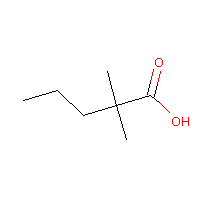
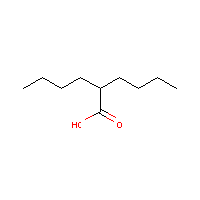
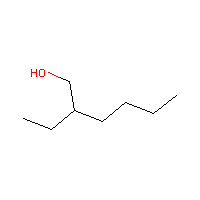
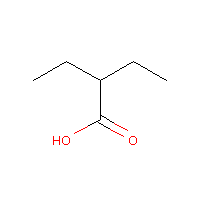
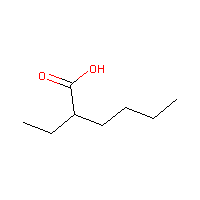

In [18]:
cs_cmpds_df[['name', 'mol']].head()

In [19]:
cs_cmpds_df.to_pickle(os.path.join(data_dir, 'case_study_compounds.pkl'))

# cs_cmpds_df.drop('mol', axis=1).to_excel('case_study_compounds_141216.xlsx', index=False)

In [20]:
# cs_cmpds_df = pd.read_pickle(os.path.join(data_dir, 'case_study_compounds.pkl'))

# cs_cmpds_df.shape